<a href="https://colab.research.google.com/github/JGranda11/Proyecto-ai4eng20241/blob/main/08%20-%20modelos%20usando%20p2%20y%20SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocesado numero 2
Para la realización de esta limpieza tomamos de referencia el priemro, y decidimos tomar algoritmos oguales a los que teniamos en el primer acercamiento

In [1]:
#bibliotecas de machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit, KFold, cross_val_score

# Libreria para transformar los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seaborn: Libreria para la visualización de datos
import seaborn as sns

In [2]:
train = pd.read_csv('trainP.csv')

In [3]:
test = pd.read_csv('testP.csv')

In [4]:
test.shape, train.shape

((296786, 52), (692500, 52))

## Definción de la estructura

In [5]:
X = train.drop(['RENDIMIENTO_GLOBAL'],axis=1)

In [6]:
Xtest = test.drop(['ID'], axis=1)

In [7]:
y = train['RENDIMIENTO_GLOBAL'].values

In [8]:
print(np.unique(X))
print(np.unique(y))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3.]


## Partición de los datos
Se quiere tomar una partición de los datos como se hizo en el primer caso

In [9]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que usamos para medir una metrica
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(692500, 51) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 51) (207750, 51)


In [11]:
estimator1 = DecisionTreeClassifier()
z1 = cross_validate(estimator1, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

In [12]:
z1

{'fit_time': array([ 4.5516901 , 12.70512819,  6.23155499,  3.76690483,  3.6614306 ]),
 'score_time': array([0.20436192, 0.30359221, 0.14681745, 0.12797832, 0.12873173]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.34458999, 0.34291215, 0.34359979, 0.34144061, 0.34380609]),
 'train_score': array([0.77842481, 0.77855448, 0.77825094, 0.77844544, 0.77843366])}

In [13]:
estimator2 = RandomForestClassifier(max_depth = 15)
z2 = cross_validate(estimator2, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

In [15]:
z2

{'fit_time': array([55.31026602, 50.97593307, 50.28741717, 45.73684025, 46.02279711]),
 'score_time': array([7.15652847, 4.80316448, 3.79813719, 3.75032163, 3.73883462]),
 'estimator': [RandomForestClassifier(max_depth=15),
  RandomForestClassifier(max_depth=15),
  RandomForestClassifier(max_depth=15),
  RandomForestClassifier(max_depth=15),
  RandomForestClassifier(max_depth=15)],
 'test_score': array([0.40560426, 0.40533608, 0.40411896, 0.40702768, 0.40512292]),
 'train_score': array([0.50738083, 0.50589847, 0.50837398, 0.50675017, 0.50616665])}

In [16]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))

## Modelo Selección
El modelo 2, tiene un mejor Score y se elige para las demas consideraciones

In [17]:
estimator2.fit(Xtr, ytr)
estimator2.score(Xtr, ytr), estimator2.score(Xts, yts)

(0.4870097988653945, 0.40700361010830327)

In [18]:
# Libreria para transformar los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_transformed = StandardScaler().fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)

<ipython-input-19-d43dbfaf3e6b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['FAMI_ESTRATOVIVIENDA'], ax=ax[0])
<ipython-input-19-d43dbfaf3e6b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[:, 0], ax=ax[1])
<ipython-input-19-d43dbfaf3e6b>:13: UserWarning: 

`distplot` is 

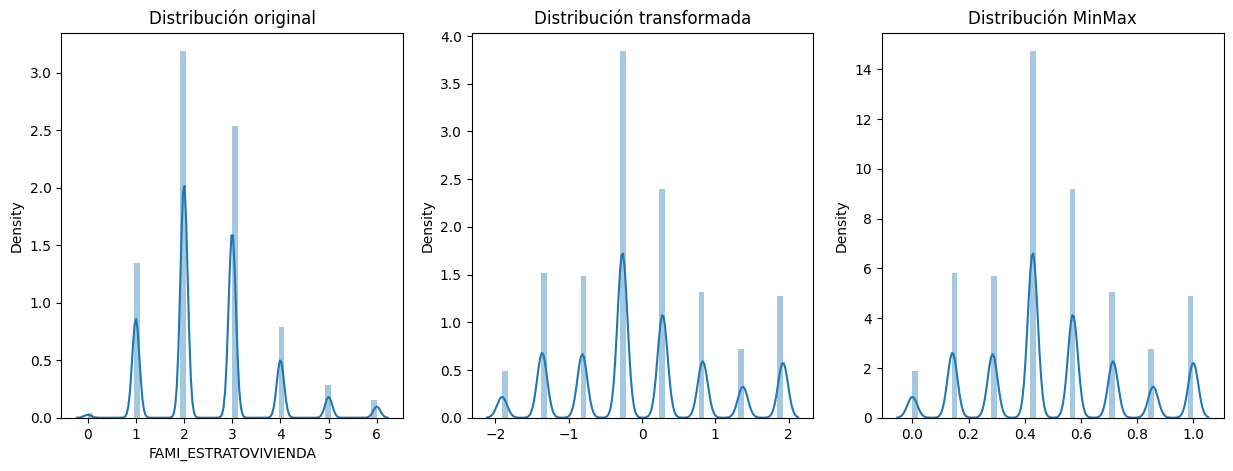

In [19]:
import seaborn as sns

# Graficos interactivos
# Plotly: Libreria para la visualización de datos interactivos
import plotly.express as px
import plotly.subplots as sp

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(X['FAMI_ESTRATOVIVIENDA'], ax=ax[0])
ax[0].set_title('Distribución original')
sns.distplot(X_transformed[:, 0], ax=ax[1])
ax[1].set_title('Distribución transformada')
sns.distplot(X_minmax[:, 0], ax=ax[2])
ax[2].set_title('Distribución MinMax')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X_transformed.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que usamos para medir una metrica
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=test_size)
print (X_train.shape, X_test.shape)

(692500, 51) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 51) (207750, 51)


In [21]:
estimator2 = RandomForestClassifier(max_depth=5)
z2 = cross_validate(estimator2, X_train, y_train, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=3, test_size=0.3))

In [22]:
z2

{'fit_time': array([31.29090834, 36.1235323 , 24.32809043]),
 'score_time': array([1.46511102, 2.08982706, 1.34909296]),
 'estimator': [RandomForestClassifier(max_depth=5),
  RandomForestClassifier(max_depth=5),
  RandomForestClassifier(max_depth=5)],
 'test_score': array([0.3886677 , 0.3868317 , 0.38804882]),
 'train_score': array([0.38606056, 0.38548294, 0.3872099 ])}

## Conclusion Transformacion 1
No obtenemos un cambio significativo con ningun modelo, de hecho empeoro el Socre

In [23]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X_transformed.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que usamos para medir una metrica
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_minmax , y, test_size=test_size)
print (X_train2.shape, X_test2.shape)

(692500, 51) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 51) (207750, 51)


In [25]:
estimator2MS = RandomForestClassifier(max_depth = 10)
z2MS = cross_validate(estimator2MS, X_train2, y_train2, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=3, test_size=0.3))

In [26]:
z2MS

{'fit_time': array([51.18298292, 41.28130627, 45.63535762]),
 'score_time': array([2.30413508, 2.48493934, 3.62888694]),
 'estimator': [RandomForestClassifier(max_depth=10),
  RandomForestClassifier(max_depth=10),
  RandomForestClassifier(max_depth=10)],
 'test_score': array([0.40083204, 0.40182225, 0.40205604]),
 'train_score': array([0.4156664 , 0.41562219, 0.41454358])}

## Optimización
ae quiere ver si con los datos no trasnformados, podemos sacarle el maximo provecho al algoritmo de clasificación

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Estimadores
n_estimators = [int(x_minmax) for x_minmax in np.linspace(start = 10, stop = 100, num = 10)]
# Profundidad
max_depth = [int(x_minmax) for x_minmax in np.linspace(1, 20, num = 10)]
max_depth.append(None)

max_features = ['log2', 'sqrt']

criterion = ['gini', 'entropy']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]
# Crear la cuadricula aleatoria
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
forest =RandomForestClassifier()
# Busqueda aleatoria de parametros, usando 3 cv
# Busca en 10 combinaciones diferentes, y usa todos los nucleos disponibles
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
# Ajustar el modelo
rf_random.fit(Xtr, ytr)
# Mostrar los mejores parametros
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 17,
 'criterion': 'entropy'}

In [29]:
forestDef = RandomForestClassifier(n_estimators=80, max_depth=17, min_samples_split=10, min_samples_leaf=4, criterion='entropy')
zDef = cross_validate(forestDef, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=3, test_size=0.3))

In [30]:
zDef

{'fit_time': array([44.62149096, 40.92296457, 40.22159195]),
 'score_time': array([3.5460124 , 3.16053987, 3.86337042]),
 'estimator': [RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80),
  RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80),
  RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=4,
                         min_samples_split=10, n_estimators=80)],
 'test_score': array([0.40802476, 0.40530858, 0.40895994]),
 'train_score': array([0.48469756, 0.48402564, 0.48392544])}

## Conclusiones
En general el preprocesado no presenta mejoria en los puntajes de precisión y se decide realizar un tercer preprocesado